In [1]:
import blocksci

import sys, os, os.path, socket
import numpy as np
import zarr
import time
import pandas as pd
from collections import defaultdict
from decimal import Decimal, getcontext
import datetime
import math


def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

def clamp(n, minn, maxn):
    if n < minn:
        return minn
    elif n > maxn:
        return maxn
    else:
        return n

# Counting number of True and False values in cluster_is_black_ground_truth 

In [7]:
array_zarr = zarr.load('uniform_black/heur_1_data/cluster_is_black_ground_truth.zarr') #load zarr file into array
#df = pd.DataFrame (array_zarr) ## convert your array into a dataframe
#filepath = 'zarr_to_excel.csv'
#df.to_csv(filepath, index=False)
countTrue = np.where(array_zarr==True)
countFalse = np.where(array_zarr==False)
element_count_False = countFalse[0].size
element_count_True = countTrue[0].size
print(len(array_zarr))
print(element_count_False)
print(element_count_True)
print(array_zarr)
black_clusters = set(countTrue[0])
print(black_clusters)
for i in countTrue:
    print(i)

591692716
591692581
135
[False False False ... False False False]
{94921217, 94987784, 94968329, 93820427, 94981133, 94285328, 95277585, 99064866, 94969379, 94977574, 94912551, 99055654, 94907956, 99422262, 95275069, 94984257, 94949444, 94624325, 94943306, 94943818, 94797389, 94974547, 94947412, 94950484, 94985299, 94985822, 92044383, 94668900, 94982761, 99066985, 94963307, 94620783, 94894707, 94954100, 94934648, 94981757, 94904451, 93822603, 94950027, 94952593, 94986385, 96015866, 94998167, 99061401, 99061408, 94913697, 94951587, 88316586, 94897322, 94978733, 94971061, 94905527, 94944952, 94939326, 94972606, 107302595, 94978757, 94944968, 94947040, 94961888, 94981858, 94616297, 94941929, 94910188, 89576173, 115726064, 94966001, 97655034, 94926589, 94982403, 94937864, 94918924, 90613521, 94918931, 93821719, 94978840, 94972700, 94887197, 101080866, 94900520, 94982968, 112150330, 94987067, 94898493, 94914365, 94969678, 94928208, 94977365, 94966614, 94967639, 94969686, 86826333, 97655136,

# Reading address_cluster_map.zarr

In [3]:
array_zarr = zarr.load('/export/consensus-2/blockchain_parsed/bitcoin/heur_1_data/address_cluster_map.zarr') #load zarr file into array
df = pd.DataFrame (array_zarr) ## convert your array into a dataframe
# filepath = 'zarr_to_excel.csv'
# df.to_csv(filepath, index=True)
print(df)

                    0
0           591352664
1           591352665
2           591352666
3           591352667
4           591352668
...               ...
4022303267  591352659
4022303268  591352660
4022303269  591352661
4022303270  591352662
4022303271  591352663

[4022303272 rows x 1 columns]


# Importing saved results NPY vs ZARR:

In [ ]:
for i in range(49990,49996):
    # import npy and place in dict
    start_time = datetime.datetime.now()
    P = np.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data/current_assets/current_assets_block_{str(i).zfill(6)}.npy', allow_pickle=True) #load gives an object array containing this dictionary:
    current_assets =defaultdict(lambda: np.zeros(2))
    current_assets.update(P.item())
    end_time = datetime.datetime.now()
    print(end_time - start_time)

    print(f'current_assets length')
    print(len(current_assets))

    start_time = datetime.datetime.now()
    # import zarr and place in dict
    current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets/current_assets_values_block_{str(i).zfill(6)}.zarr') #load gives an object array containing this dictionary:
    current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets_index/current_assets_index_block_{str(i).zfill(6)}.zarr')
    current_assets_zarr = dict(zip(current_assets_index_zarr, current_assets_zarr))
    end_time = datetime.datetime.now()
    print(end_time - start_time)
    print(f'current_assets_zarr length')
    print(len(current_assets_zarr))

    for key in current_assets.keys() & current_assets_zarr.keys():
        value1 = current_assets[key]
        value2 = current_assets_zarr[key]
        if value1 != value2:
            print("error")
    
    # i = 0
    # for k, v in current_assets_zarr.items():
    #     print(f'{k}:{format_e(Decimal(v))}, ', end='')


    # i = 0
    # for k, v in current_assets.items():
    #     if v != 0.0 :
    #         print(f'{k}:{format_e(Decimal(v))}, ', end='')
        # if i == 9:
        #     print('\n')
        #     i = 0
        # i+=1

# Importing saved results of dark ratio daily :

In [2]:
dark_ratio_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/dark_ratio/dark_ratio_2016-03-19.zarr') #load gives an object array containing this dictionary:
# dark_ratio_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v2/daily/dark_ratio_index/dark_ratio_index_2010-07-25.zarr')
dark_ratio_zarr = dict(zip(dark_ratio_zarr["dark_ratio_index"], dark_ratio_zarr["dark_ratio_values"]))

size = len(dark_ratio_zarr)
print(f'size of dark_ratio_zarr={size}')

undesired_values = 0
normal_values = 0
zero_values = 0
nan_values= 0
inf_values=0
for key in dark_ratio_zarr.keys():

    if dark_ratio_zarr[key] < 0 or dark_ratio_zarr[key] > 1:
        undesired_values += 1

    if math.isnan(dark_ratio_zarr[key]):
        nan_values += 1
    
    if math.isinf(dark_ratio_zarr[key]):
        inf_values += 1
        
    if dark_ratio_zarr[key] > 0 and dark_ratio_zarr[key] <= 1 :
        normal_values += 1
    
    if dark_ratio_zarr[key] == 0 :
        zero_values += 1

print(f'number of normal_values={normal_values}, ratio of normal_values={normal_values/size}')
print(f'number of undesired_values={undesired_values}, ratio of undesired_values (negative or more than 1)={undesired_values/size}')
print(f'number of zero_values={zero_values}, ratio of zero_values={zero_values/size}')
print(f'number of nan_values={nan_values}, ratio of nan_values={nan_values/size}')
print(f'number of inf_values={inf_values}, ratio of inf_values={inf_values/size}')

size of dark_ratio_zarr=55521836
number of normal_values=49452262, ratio of normal_values=0.8906813168065983
number of undesired_values=0, ratio of undesired_values (negative or more than 1)=0.0
number of zero_values=6069574, ratio of zero_values=0.1093186831934016
number of nan_values=0, ratio of nan_values=0.0
number of inf_values=0, ratio of inf_values=0.0


# Importing saved results of current_assets daily :

In [3]:
current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/current_assets/current_assets_2016-03-19.zarr') #load gives an object array containing this dictionary:
# current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v2/daily/current_assets_index/current_assets_index_2014-07-25.zarr')

# current_assets_zarr_old = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final/daily/dark_ratio/dark_ratio_values_2012-12-04.zarr') #load gives an object array containing this dictionary:
# current_assets_index_zarr_old = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final/daily/dark_assets_index/dark_ratio_index_2012-12-04.zarr')

# current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final_daily_weekly_new/daily/dark_ratio/dark_ratio_values_2013-05-04.zarr') #load gives an object array containing this dictionary:
# current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final_daily_weekly_new/daily/dark_ratio_index/dark_ratio_index_2011-04-04.zarr')

current_assets_zarr = dict(zip(current_assets_zarr["current_assets_index"], current_assets_zarr["current_assets_values"]))
# current_assets_zarr_old = dict(zip(current_assets_index_zarr_old, current_assets_zarr_old))

# if current_assets_zarr_old == current_assets_zarr:
#     print("true")

size = len(current_assets_zarr)
print(f'size of current_assets_zarr={size}')
# print(len(current_assets_zarr_old))
# for k, v in current_assets_zarr.items():
#     for kk, vv in current_assets_zarr_old:
#for key in current_assets_zarr.keys() & current_assets_zarr_old.keys():

undesired_values = 0
normal_values = 0
zero_values = 0
nan_values= 0
inf_values=0

for key in current_assets_zarr.keys():

        if current_assets_zarr[key] < 0:
            undesired_values += 1
        
        if math.isnan(current_assets_zarr[key]):
            nan_values += 1
    
        if math.isinf(current_assets_zarr[key]):
            inf_values += 1

        if current_assets_zarr[key] > 0:
            normal_values += 1
        
        if current_assets_zarr[key] == 0:
            zero_values += 1

print(f'number of normal_values={normal_values}, ratio of normal_values={normal_values/size}')
print(f'number of undesired_values={undesired_values}, ratio of undesired_values (negative)={undesired_values/size}')
print(f'number of zero_values={zero_values}, ratio of zero_values={zero_values/size}')
print(f'number of nan_values={nan_values}, ratio of nan_values={nan_values/size}')
print(f'number of inf_values={inf_values}, ratio of inf_values={inf_values/size}')
# i = 0
# count = 0
# total = 0
# for k, v in current_assets_zarr.items():
    
#     count = count + 1
#     total = total + v
#     # if i == 9:
#     #     print('\n')
#     #     i = 0
#     # i+=1
# print(count)
# print(total)
#311280386000000.0 new on 2010-05-04
#311280386000000.0 heur_1_data_final on 2010-05-04
#316704954000000.0 old on 2010-05-04
#695143585860158.0 new on 2011-05-04
#695143585860158.0 heur_1_data_final on 2011-05-04
#854471174476544.0 old on 2011-05-04
#xxx new on 2012-05-04
#1019590075699663.4 heur_1_data_final on 2012-05-04
#1843247658153783.8 old on 2012-05-04

# Notes: my code always saves dark ratio, his code saves only when nodes have made transactions

# with open('result.txt', 'a') as fp:
#     fp.write(print(current_assets_zarr))

size of current_assets_zarr=55521836
number of normal_values=51968939, ratio of normal_values=0.9360090145433951
number of undesired_values=1584, ratio of undesired_values (negative)=2.852931592535953e-05
number of zero_values=3551313, ratio of zero_values=0.0639624561406795
number of nan_values=0, ratio of nan_values=0.0
number of inf_values=0, ratio of inf_values=0.0


# Importing saved results of dark_assets daily :

In [4]:
dark_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/dark_assets/dark_assets_2016-03-19.zarr') #load gives an object array containing this dictionary:
# dark_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/dark_assets_index/dark_assets_index_2014-07-25.zarr')

dark_assets_zarr = dict(zip(dark_assets_zarr["dark_assets_index"], dark_assets_zarr["dark_assets_values"]))

size = len(dark_assets_zarr)
print(f'size of dark_assets_zarr={size}')

undesired_values = 0
normal_values = 0
zero_values = 0
nan_values= 0
inf_values=0
for key in dark_assets_zarr.keys():

        if dark_assets_zarr[key] < 0 :
            undesired_values += 1

        if math.isnan(dark_assets_zarr[key]):
            nan_values += 1
    
        if math.isinf(dark_assets_zarr[key]):
            inf_values += 1

        
        if dark_assets_zarr[key] > 0:
            normal_values += 1

        if dark_assets_zarr[key] == 0:
            zero_values += 1

print(f'number of normal_values={normal_values}, ratio of normal_values={normal_values/size}')
print(f'number of undesired_values={undesired_values}, ratio of undesired_values (negative)={undesired_values/size}')
print(f'number of zero_values={zero_values}, ratio of zero_values={zero_values/size}')
print(f'number of nan_values={nan_values}, ratio of nan_values={nan_values/size}')
print(f'number of inf_values={inf_values}, ratio of inf_values={inf_values/size}')

size of dark_assets_zarr=55519021
number of normal_values=49452262, ratio of normal_values=0.890726477327473
number of undesired_values=1151, ratio of undesired_values (negative)=2.0731633578337054e-05
number of zero_values=6065608, ratio of zero_values=0.10925279103894861
number of nan_values=0, ratio of nan_values=0.0
number of inf_values=0, ratio of inf_values=0.0


In [21]:
for k, v in dark_ratio_zarr.items():
    if k in black_clusters:
        print(f" black ground truth node with k={k} and v={v}") 

for k, v in current_assets_zarr.items():
    if k in black_clusters:
        print(f" black ground truth node with k={k} and v={v}")

 black ground truth node with k=79800777 and v=1.0
 black ground truth node with k=82285475 and v=1.0
 black ground truth node with k=79800777 and v=433669600229
 black ground truth node with k=82285475 and v=313902000


# Importing saved results per block:


In [ ]:
for i in range(49995,49996):
    current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets/current_assets_values_block_{str(i).zfill(6)}.zarr') #load gives an object array containing this dictionary:
    current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets_index/current_assets_index_block_{str(i).zfill(6)}.zarr')
    print(f'current_assets before')
    print(len(current_assets_zarr))
    i = 0
    for v, k in zip(current_assets_zarr, current_assets_index_zarr):
        print(f'{k}:{format_e(Decimal(v))}, ', end='')
        # if i == 9:
        #     print('\n')
        #     i = 0
        # i+=1

# Gray Scale Model

### Important Variables:

In this task we will be implementing the SIR model with the following system parameters:

*   $a_{i}(b)$: total amount of assets hold by user i by the end of block b.
*   $d_{i}(b)$: total amount of black assets hold by node i by the end of block b.
*   $x_{i}(b)$: = $\frac{d_{i}(b)}{a_{i}(b)} $ black assets fraction by the end of block b.
*   $c_{i}(b)$: amount of clean asset owned by node i by the end of block b
*   $m_{i}(b)$: the amount mined by user i by the end of block b
*   $W(b)$: = {$w_{ij}$}$_{i,j=1,...,N}$ is the adjacency matrix of the transaction network at block b. wij is equal to the amount of bitcoin moved from user i to user j at block b.
*   $N = Nusers = |Nusers|$ total number of users in the network.

Below is a summary of the dynamics of the SIR model:

In [18]:
# print(float('nan')/10000000000)
# 2.2250738585072014e-308 - 1e-100
# print(float('-inf')/10000000000)
# print(10000000000/float('-inf'))
# max(0, 20000000000)
# print(clamp(float('nan'), 0.0, 1.0))
# print(abs(-14556456456456))
# str(float('nan'))
getcontext().prec = 50
print(clamp(int(0) + int(Decimal(1050000)*Decimal(0.04901757660081550558805350746)), int(0), int(1050000)))

print(Decimal(0.04901757660081550558805350746))

print(Decimal(str(0.04901757660081550558805350746)))
print(str(Decimal(0.04901757660081550558805350746)))

51468
0.049017576600815508658381958184691029600799083709716796875
0.04901757660081551
0.049017576600815508658381958184691029600799083709716796875


KeyboardInterrupt: 

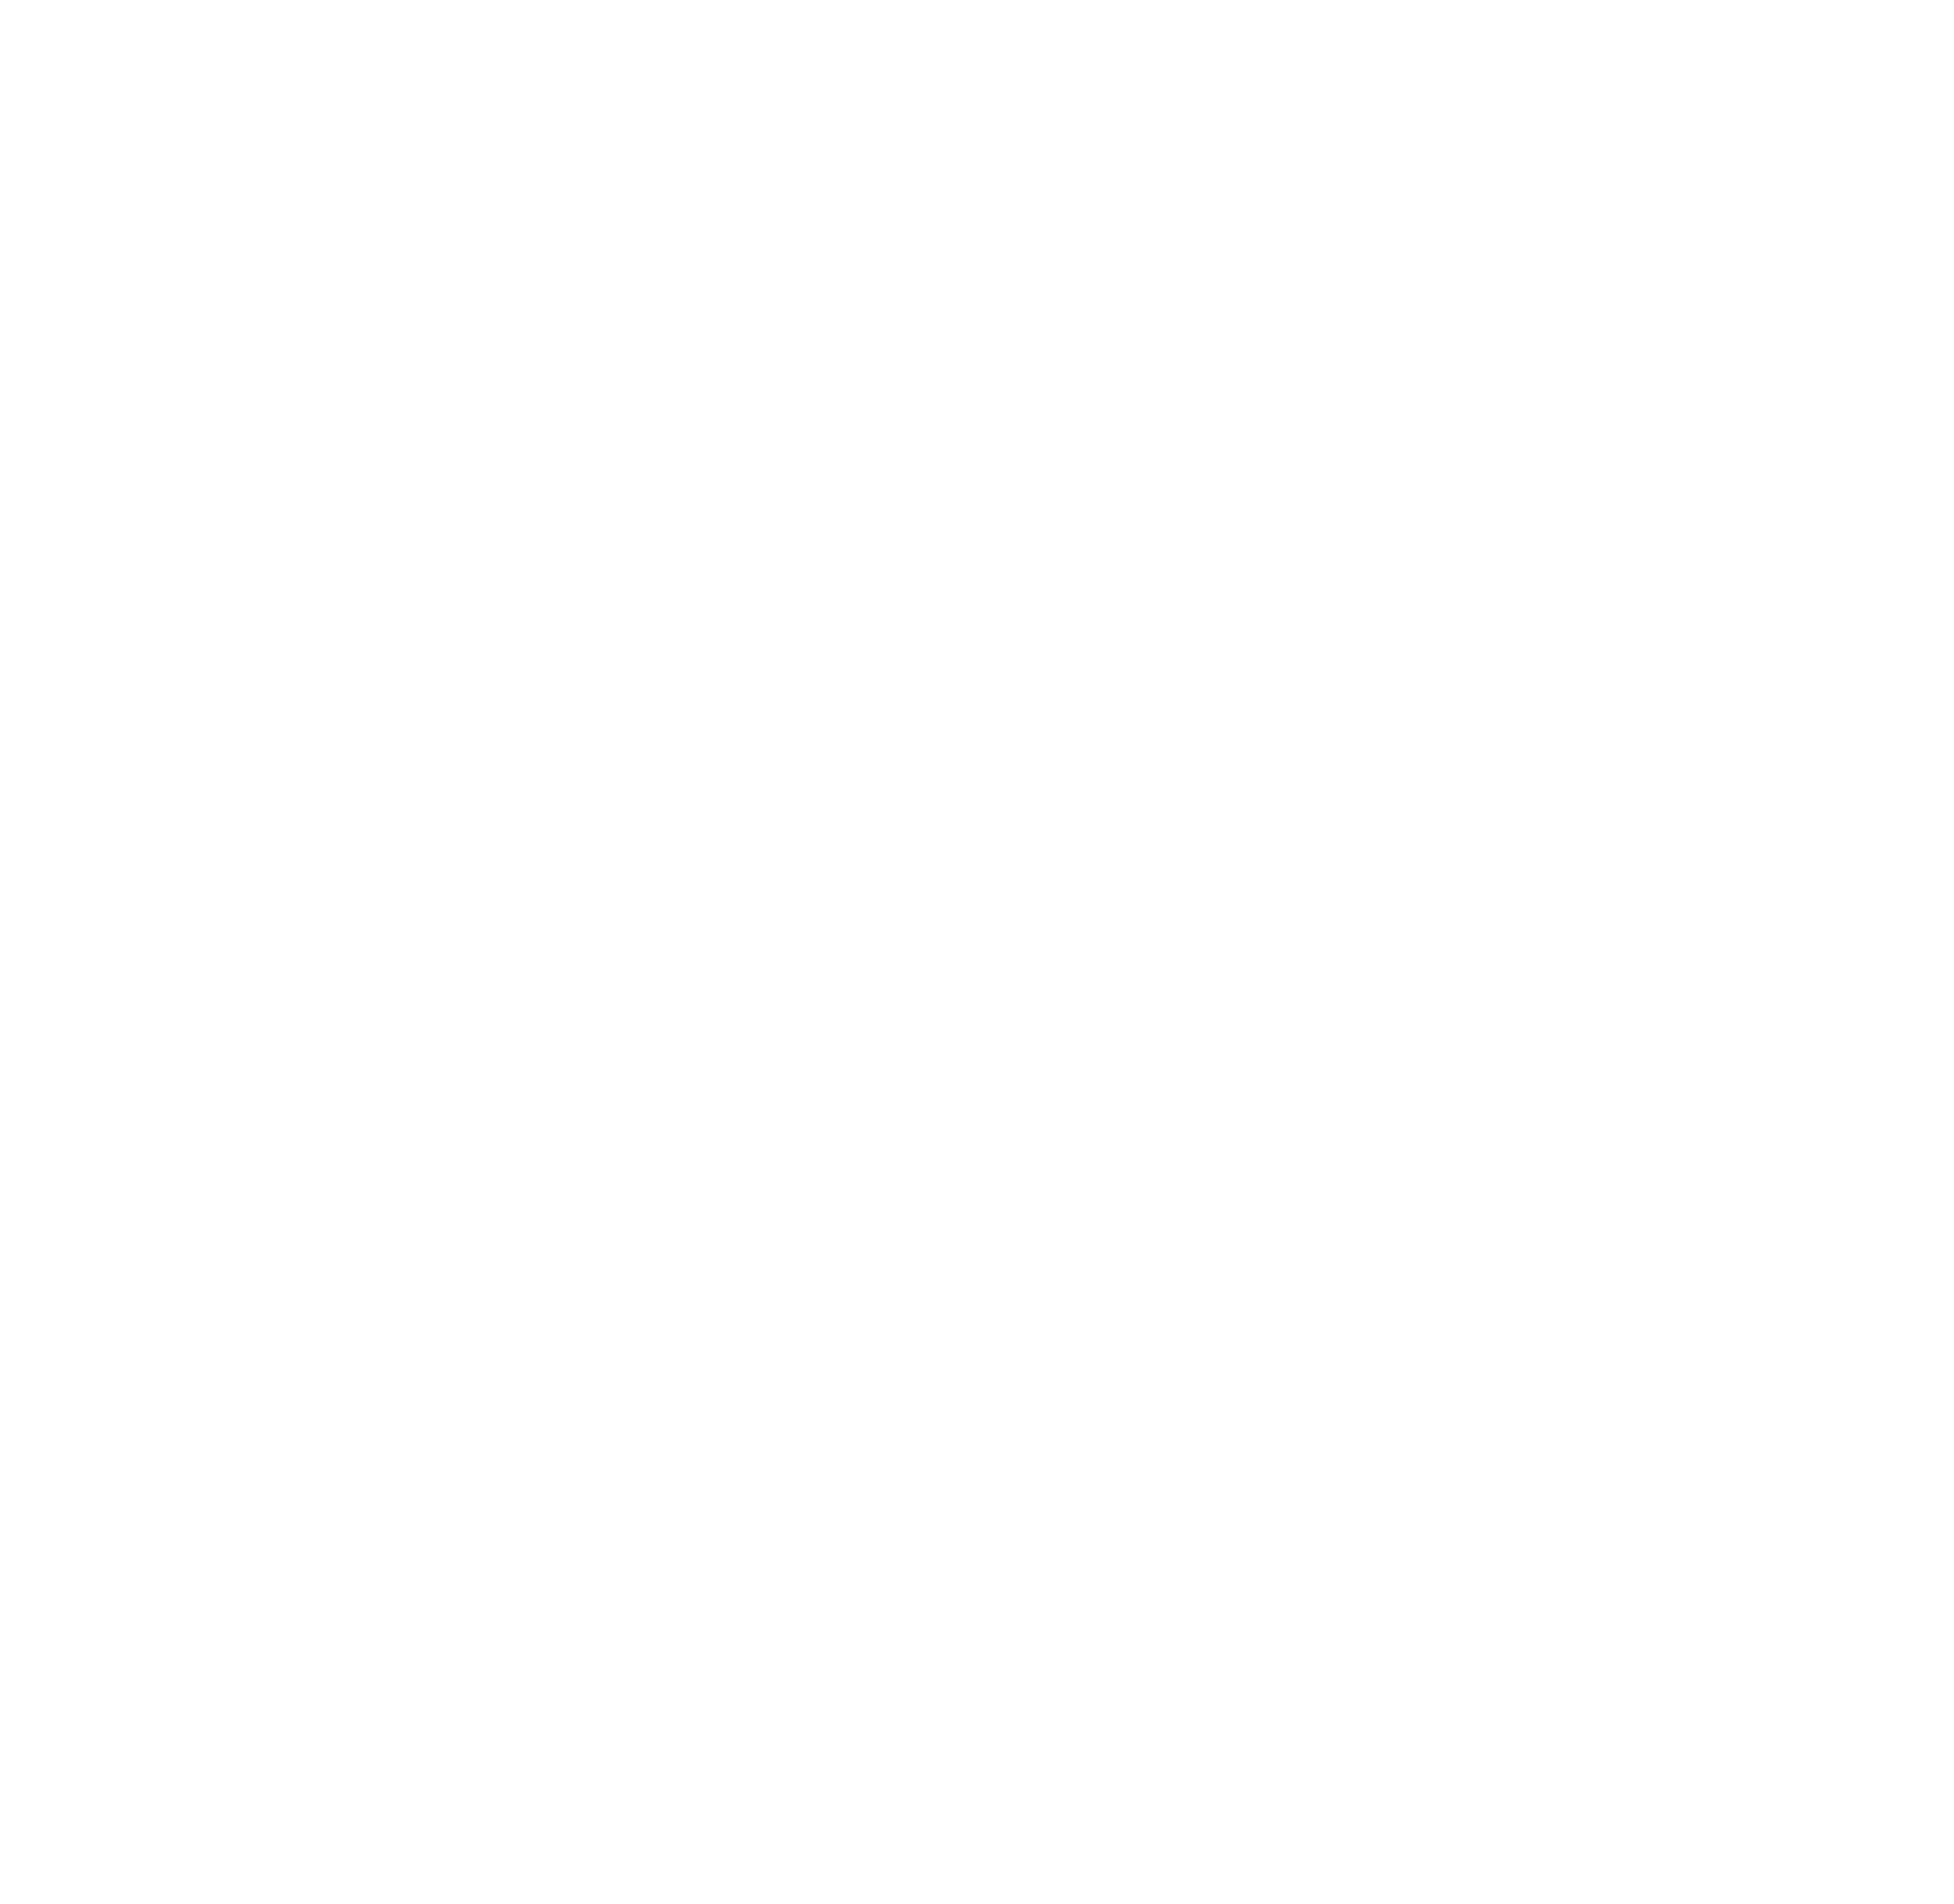

In [23]:
from conformity import attribute_conformity
import matplotlib.pyplot as plt
from matplotlib import pylab
import networkx as nx
import numpy as np

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(40, 40), dpi=200)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    # cut = 1.00
    # xmax = cut * max(xx for xx, yy in pos.values())
    # ymax = cut * max(yy for xx, yy in pos.values())
    # plt.xlim(0, xmax)
    # plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

g = nx.DiGraph()

networks_path = f"/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_networks_v2_final/week"
unit_graph_file = f"{networks_path}/2013-04-13.graphml.bz2"
g = nx.read_graphml(unit_graph_file)

#Assuming that the graph g has nodes and edges entered
save_graph(g,"graphs/weekly_graph_2014-04-13.jpg")

#it can also be saved in .svg, .png. or .ps formats




print(f"Drawing graph of size {g.size()}")
nx.draw(g, pos=nx.spring_layout(g))
# node_to_conformity = attribute_conformity(g.to_undirected(), list(np.arange(1, 4, 0.2)), ['color'], profile_size=1)
# print(node_to_conformity)